In [2]:
import os
import fnmatch

import numpy as np

from astropy.io import fits
from astropy.table import Table, vstack, hstack

## KiDS multi-band catalog

In [3]:
local_kids_dir = '/data2/lsajkov/mpdg/data/KiDS_spectroscopy'

### RA/Dec catalog:

In [4]:
KiDS_positions_catalog = Table()

for kids_multiband_cat in fnmatch.filter(os.listdir(local_kids_dir),
                                         'KiDS_DR4.1*ugriZYJHKs_cat.fits'):
    
    with fits.open(f'{local_kids_dir}/{kids_multiband_cat}') as cat:
        catData = Table(cat[1].data)
    
    KiDS_positions_catalog = vstack([KiDS_positions_catalog,
                                     catData['ID', 'RAJ2000', 'DECJ2000']])

In [6]:
KiDS_positions_catalog.write('/data2/lsajkov/mpdg/data_products/KiDS/KiDS_concat_radec_positions.fits',
                             overwrite = True)

### Photometry catalog:

ID, position, size, 9-band photometry

In [9]:
#desired data columns
with fits.open(f'{local_kids_dir}/{fnmatch.filter(os.listdir(local_kids_dir), 'KiDS_DR4.1*ugriZYJHKs_cat.fits')[0]}') as hdu:
    hduData = Table(hdu[1].data)
    
ID_cols = ['ID', 'KIDS_TILE', 'THELI_NAME']

position_cols = ['RAJ2000', 'DECJ2000']

size_cols = ['FWHM_WORLD']

MAG_GAAP_bands    = [band for band in hduData.keys()\
                  if (fnmatch.fnmatch(band, 'MAG_GAAP_*') & (not fnmatch.fnmatch(band, 'MAG_GAAP_*_*')))]

MAGERR_GAAP_bands = [band for band in hduData.keys()\
                  if (fnmatch.fnmatch(band, 'MAGERR_GAAP_*') & (not fnmatch.fnmatch(band, 'MAGERR_GAAP_*_*')))]

COLOUR_GAAP_bands = [band for band in hduData.keys()\
                  if fnmatch.fnmatch(band, 'COLOUR_GAAP_*')]

index_array =  [ID_cols,
                position_cols,
                size_cols,
                MAG_GAAP_bands,
                MAGERR_GAAP_bands,
                COLOUR_GAAP_bands]

column_indices = [index for array in index_array for index in array]

In [11]:
KiDS_concatenated_catalog = Table()

for kids_multiband_cat in fnmatch.filter(os.listdir(local_kids_dir),
                                         'KiDS_DR4.1*ugriZYJHKs_cat.fits'):
    
    with fits.open(f'{local_kids_dir}/{kids_multiband_cat}') as cat:
        catData = Table(cat[1].data)
    
    KiDS_concatenated_catalog = vstack([KiDS_concatenated_catalog,
                                     catData[column_indices]])

: 

In [ ]:
def 

### SOM catalog
Only within primary targeting region <br>
Color-color catalog

In [5]:
#define primary targeting region
def gr_color_condition(gr_color, gr_color_err,
               r_mag):
    
    return (gr_color - gr_color_err + 0.06 * (r_mag - 14)) < 0.9


# def surf_bright_condition(surf_bright_r, surf_bright_r_err,
#                                  r_mag):
    
#     return (surf_bright_r + surf_bright_r_err\
#             - 0.7 * (r_mag - 14)) > 18.5

In [23]:
import matplotlib.pyplot as plt

In [24]:
with fits.open('/data2/lsajkov/mpdg/data/KiDS_spectroscopy/KiDS_DR4.0_1.1_-29.2_ugriZYJHKs_cat.fits') as cat:
    testCat = Table(cat[1].data)

(array([ 160.,  183.,  167.,  181.,  218.,  245.,  305.,  375.,  542.,
         661.,  928., 1175., 1399., 1673., 1902., 2162., 2345., 2408.,
        2424., 2471., 2429., 2343., 2314., 2189., 2106., 1995., 1882.,
        1751., 1672., 1624., 1561., 1444., 1312., 1351., 1265., 1204.,
        1127., 1007.,  997.,  922.,  888.,  810.,  774.,  747.,  693.,
         667.,  670.,  626.,  593.,  622.,  544.,  534.,  512.,  457.,
         455.,  452.,  469.,  370.,  420.,  372.,  354.,  381.,  365.,
         371.,  310.,  314.,  308.,  320.,  302.,  324.,  305.,  244.,
         289.,  261.,  243.,  251.,  291.,  241.]),
 array([ 1.0001992 ,  1.24378204,  1.48736501,  1.73094785,  1.9745307 ,
         2.21811366,  2.46169662,  2.70527935,  2.94886231,  3.19244528,
         3.436028  ,  3.67961097,  3.92319393,  4.16677666,  4.41035938,
         4.65394258,  4.89752531,  5.14110804,  5.38469124,  5.62827396,
         5.87185669,  6.11543989,  6.35902262,  6.60260534,  6.84618855,
         7.0897

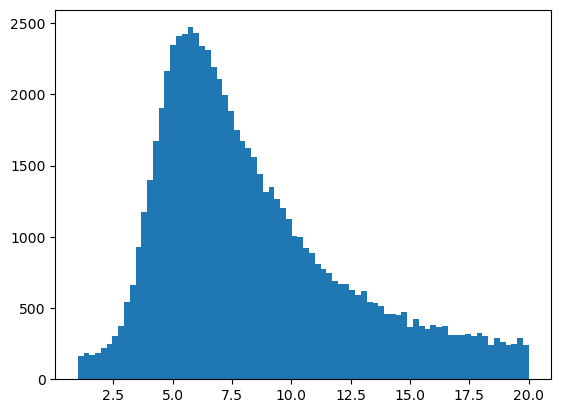

In [27]:
SNR = testCat['FLUX_GAAP_r']/testCat['FLUXERR_GAAP_r']
plt.hist(SNR[SNR < 20],
         bins = 'auto')

In [28]:
KiDS_SOM_catalog = Table()

for kids_multiband_cat in fnmatch.filter(os.listdir(local_kids_dir),
                                         'KiDS_DR4.1*ugriZYJHKs_cat.fits'):
    
    with fits.open(f'{local_kids_dir}/{kids_multiband_cat}') as cat:
        catData = Table(cat[1].data)

    KiDS_flags_mask = catData['FLAG_GAAP_r'] == 0

    r_SNR = catData['FLUX_GAAP_r']/catData['FLUXERR_GAAP_r']

    r_mag = catData['MAG_GAAP_r']
    r_mag_err = catData['MAGERR_GAAP_r']
    g_mag_err = catData['MAGERR_GAAP_g']
    u_mag_err = catData['MAGERR_GAAP_u']
    i_mag_err = catData['MAGERR_GAAP_i']

    gr_color = catData['COLOUR_GAAP_g_r']
    gr_color_err = np.sqrt(r_mag_err ** 2 + g_mag_err ** 2)

    ug_color = catData['COLOUR_GAAP_u_g']
    ug_color_err = np.sqrt(u_mag_err ** 2 + g_mag_err ** 2)

    ri_color = catData['COLOUR_GAAP_r_i']
    ri_color_err = np.sqrt(r_mag_err ** 2 + i_mag_err ** 2)

    ur_color = catData['COLOUR_GAAP_u_g'] + catData['COLOUR_GAAP_g_r']
    ur_color_err = np.sqrt(u_mag_err ** 2 + r_mag_err ** 2)

    # fwhm = catData['FWHM_WORLD']

    # surf_bright_r = r_mag + 2.5 * np.log10(2 * np.pi * (fwhm/2) ** 2)

    gr_color_mask = gr_color_condition(gr_color,
                                       gr_color_err,
                                       r_mag)
    
    # surf_bright_mask = surf_bright_condition(surf_bright_r,
    #                                          r_mag_err,
    #                                          r_mag)
    
    r_mag_mask = r_mag > 18

    r_SNR_mask = r_SNR > 5

    complete_mask = KiDS_flags_mask & gr_color_mask & r_mag_mask & r_SNR_mask #& surf_bright_mask

    tile_KiDS_data = hstack([r_mag,    r_mag_err,
                             gr_color, gr_color_err,
                             ug_color, ug_color_err,
                             ri_color, ri_color_err,
                             ur_color, ur_color_err]) 
    tile_KiDS_data.rename_columns(tile_KiDS_data.colnames,
                           ['r_mag',    'r_mag_err',
                            'gr_color', 'gr_color_err',
                            'ug_color', 'ug_color_err',
                            'ri_color', 'ri_color_err',
                            'ur_color', 'ur_color_err'])
    tile_KiDS_data = tile_KiDS_data[complete_mask]

    KiDS_SOM_catalog = vstack([KiDS_SOM_catalog,
                               tile_KiDS_data])

In [21]:
KiDS_SOM_catalog.write('/data2/lsajkov/mpdg/data_products/KiDS/KiDS_SOM_catalog.fits')